In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import sklearn as sk


In [2]:
news = fetch_20newsgroups(subset='all')

# Да их действительно 20
print(len(news.target_names))
pprint(list(news.target_names))

20
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [3]:
news_df = list(zip(news.data, news.target))
news_df = pd.DataFrame(data=news_df, columns=['news', 'target'])

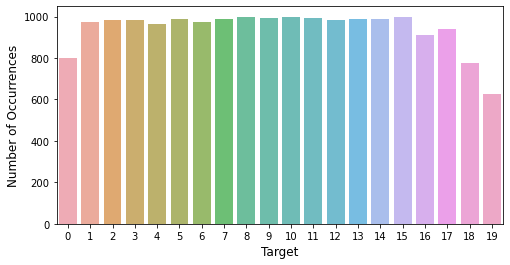

In [4]:
count_target = news_df['target'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=count_target.index, y=count_target.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12);

In [5]:
print(news.filenames.shape)
print(news.target.shape)

(18846,)
(18846,)


In [6]:
print(news.target[7])
print(news.data[7])

10
From: dchhabra@stpl.ists.ca (Deepak Chhabra)
Subject: Re: Atlanta Hockey Hell!!
Nntp-Posting-Host: stpl.ists.ca
Organization: Solar Terresterial Physics Laboratory, ISTS
Lines: 24

In article <0foVj7i00WB4MIUmht@andrew.cmu.edu> Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu> writes:
>
>Well, it's not that bad. But I am still pretty pissed of at the
>local ABC coverage. They cut off the first half hour of coverage by playing

[stuff deleted]

Ok, here's the solution to your problem.  Move to Canada.  Yesterday I was able
to watch FOUR games...the NJ-PITT at 1:00 on ABC, LA-CAL at 3:00 (CBC), 
BUFF-BOS at 7:00 (TSN and FOX), and MON-QUE at 7:30 (CBC).  I think that if
each series goes its max I could be watching hockey playoffs for 40-some odd
consecutive nights (I haven't counted so that's a pure guess).

I have two tv's in my house, and I set them up side-by-side to watch MON-QUE
and keep an eye on BOS-BUFF at the same time.  I did the same for the two
afternoon games.

Btw, those AB

In [7]:
# Тренировочный набор
news_train = fetch_20newsgroups(subset='train',
                              remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer() #CountVectorizer()
vectors = vectorizer.fit_transform(news_train.data)

In [8]:
# Получаем разряженную матрицу
print(vectors.shape)

# Ненулевые значения
print(vectors.nnz)

# В среднем слово встречается в новостях
print(vectors.nnz / float(vectors.shape[0]))

(11314, 101631)
1103627
97.54525366802191


In [9]:
# Тестовый набор
news_test = fetch_20newsgroups(subset='test',
                              remove=('headers', 'footers', 'quotes'))
vectors_test = vectorizer.transform(news_test.data)

In [10]:
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, news_train.target)

MultinomialNB(alpha=0.01)

In [11]:
pred = clf.predict(vectors_test)

In [12]:
# Общая достоверность предсказаний
metrics.f1_score(news_test.target, pred, average='micro')

0.7002124269782263

In [13]:
# Средняя достовреность предсказаний на столбец
metrics.f1_score(news_test.target, pred, average='macro')

0.682861129525057

In [14]:
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-20:-10]
        print("%s ---- %s" % (category, " ".join(feature_names[top10])))

In [15]:
show_top10(clf, vectorizer, news_train.target_names)

alt.atheism ---- they do for what have as god this be are
comp.graphics ---- be thanks image or can any have this on that
comp.os.ms-windows.misc ---- but files this can on dos with have that in
comp.sys.ibm.pc.hardware ---- controller bus this in my on card you that have
comp.sys.mac.hardware ---- can drive my if this on have in you with
comp.windows.x ---- be have with an can on that you server motif
misc.forsale ---- please me is have new condition with you it of
rec.autos ---- this with are was cars they my have for on
rec.motorcycles ---- me your this dod have with was on is my
rec.sport.baseball ---- be at you it baseball team have for his they
rec.sport.hockey ---- players play be on they for it you is was
sci.crypt ---- on not as chip they for you clipper encryption this
sci.electronics ---- an there with or be if have are this on
sci.med ---- but msg as have with my not for be are
sci.space ---- would they are as this nasa was on you be
soc.religion.christian ---- was jesus fo

In [16]:
conf = pd.DataFrame(metrics.confusion_matrix(news_test.target, pred))

In [17]:
def count_pn(conf):
    measuring = []
    ind = []
    group = []
    for i in conf.index:
        n_sum = conf.iloc[i].sum() - conf.loc[i,i]
        measuring.append(n_sum)
        ind.append('n')
        group.append(i)
        
        measuring.append(conf.loc[i,i])
        ind.append('p')
        group.append(i)
    result = pd.DataFrame(zip(measuring, group, ind), columns=['measuring','group','ind'])
    return result

conf_df = count_pn(conf)

Text(0.5, 15.0, 'Предсказанные классы')

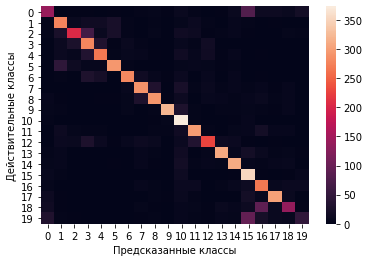

In [18]:
# Красиво выведем результат
sns.heatmap(pd.DataFrame(sk.metrics.confusion_matrix(news_test.target, pred)))
plt.ylabel('Действительные классы')
plt.xlabel('Предсказанные классы')

<Figure size 576x288 with 0 Axes>

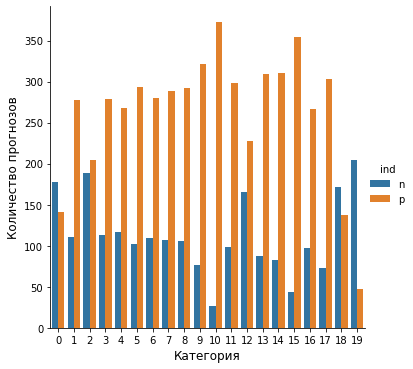

0 - alt.atheism
1 - comp.graphics
2 - comp.os.ms-windows.misc
3 - comp.sys.ibm.pc.hardware
4 - comp.sys.mac.hardware
5 - comp.windows.x
6 - misc.forsale
7 - rec.autos
8 - rec.motorcycles
9 - rec.sport.baseball
10 - rec.sport.hockey
11 - sci.crypt
12 - sci.electronics
13 - sci.med
14 - sci.space
15 - soc.religion.christian
16 - talk.politics.guns
17 - talk.politics.mideast
18 - talk.politics.misc
19 - talk.religion.misc


In [19]:
plt.figure(figsize=(8,4))
sns.catplot(data=conf_df, kind="bar", x='group', y='measuring', hue='ind')
plt.ylabel('Количество прогнозов', fontsize=12)
plt.xlabel('Категория', fontsize=12);
plt.show()

for i, name in enumerate(news_train.target_names):
    print("%s - %s" % (i, name))